In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from itertools import combinations
from collections import Counter
import matplotlib.pyplot as plt
from transformers import OpenAIGPTTokenizer
import networkx as nx


In [2]:
'''
Using the openai-gpt model to decode the data back into strings (for ease of interpretation)
Decided to do this using the preprocessed data instead of trying to muck around with the raw data
'''
tokenizer = OpenAIGPTTokenizer.from_pretrained('openai-gpt', unk_token='')

In [3]:
#Read in the ingredient map, then remove duplicate rows and reindex to use the ingredient ID

ingr_map = pd.read_pickle(filepath_or_buffer='ingr_map.pkl')

display(ingr_map)

ingr_map = ingr_map.filter(['replaced','count','id', 'processed', 'raw_ingr'])

ingr_map_clean = ingr_map.filter(['replaced','count','id']).drop_duplicates(subset='id').set_index('id')

display(ingr_map_clean)

,raw_ingr,raw_words,processed,len_proc,replaced,count,id
0,"medium heads bibb or red leaf lettuce, washed,...",13,"medium heads bibb or red leaf lettuce, washed,...",73,lettuce,4507,4308
1,mixed baby lettuces and spring greens,6,mixed baby lettuces and spring green,36,lettuce,4507,4308
2,romaine lettuce leaf,3,romaine lettuce leaf,20,lettuce,4507,4308
3,iceberg lettuce leaf,3,iceberg lettuce leaf,20,lettuce,4507,4308
4,red romaine lettuce,3,red romaine lettuce,19,lettuce,4507,4308
...,...,...,...,...,...,...,...
11654,soybeans,1,soybean,7,soybean,31,6702
11655,goose,1,goose,5,goose,8,3318
11656,ajwain,1,ajwain,6,ajwain,13,47
11657,brinjals,1,brinjal,7,brinjal,2,750


,replaced,count
id,,
4308,lettuce,4507
2744,french vanilla pudding and pie filling mix,5
6843,stove top stuffing mix,114
1910,cream cheese,9915
1168,cheddar,13304
...,...,...
6702,soybean,31
3318,goose,8
47,ajwain,13


In [4]:
#Function that takes a string representation of tokens, cleans/splits/ints them, then returns the decoded tokens

def decode_name_tokens(val: str):
  seq = [int(x.strip('[] ')) for x in val.split(',')]
  return tokenizer.decode(seq)

#Function that takes the string representation of the list of ingredient IDs, returns a new list of strings with the ingredient names

def map_ingredients(ings: str):
  int_list = [int(x.strip('[] ')) for x in ings.split(',')]
  return [ingr_map_clean.loc[id][0] for id in int_list]

In [9]:
df1 = pd.read_csv('PP_recipes.csv', delimiter=',', usecols=['id','i','name_tokens','ingredient_tokens','steps_tokens','ingredient_ids'],
        converters={   
        "name_tokens" : decode_name_tokens,
        "ingredient_ids" : map_ingredients
         })

C:\Users\Calvin\AppData\Local\Temp\ipykernel_23768\1978008609.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return [ingr_map_clean.loc[id][0] for id in int_list]


In [8]:
df1

,id,i,name_tokens,ingredient_tokens,steps_tokens,ingredient_ids
0,424415,23,"[40480, 37229, 2911, 1019, 249, 6878, 6878, 28...","[[2911, 1019, 249, 6878], [1353], [6953], [153...","[40480, 40482, 21662, 481, 6878, 500, 246, 161...","[389, 7655, 6270, 1527, 3406]"
1,146223,96900,"[40480, 18376, 7056, 246, 1531, 2032, 40481]","[[17918], [25916], [2507, 6444], [8467, 1179],...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,..."
2,312329,120056,"[40480, 21044, 16954, 8294, 556, 10837, 40481]","[[5867, 24176], [1353], [6953], [1301, 11332],...","[40480, 40482, 8240, 481, 24176, 296, 1353, 66...","[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696..."
3,74301,168258,"[40480, 10025, 31156, 40481]","[[1270, 1645, 28447], [21601], [27952, 29471, ...","[40480, 40482, 5539, 21601, 1073, 903, 2324, 4...","[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]"
4,76272,109030,"[40480, 17841, 252, 782, 2373, 1641, 2373, 252...","[[1430, 11434], [1430, 17027], [1615, 23, 695,...","[40480, 40482, 14046, 1430, 11434, 488, 17027,...","[3484, 6324, 7594, 243]"
...,...,...,...,...,...,...
178260,323143,76862,"[40480, 6444, 1964, 9369, 486, 569, 17551, 40481]","[[8780], [11835, 1762, 4465, 31494], [6812], [...","[40480, 40482, 729, 2525, 715, 485, 26641, 404...","[840, 208, 2499, 2683, 1925, 335, 1511]"
178261,149114,145962,"[40480, 17027, 24715, 974, 11877, 40481]","[[6812], [5940], [30645, 4785, 6821], [6953], ...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[2499, 4717, 1168, 6270, 6324, 7040]"
178262,34200,65066,"[40480, 12187, 11434, 1738, 2627, 40481]","[[6167, 20930, 510], [1353], [15022, 6953], [6...","[40480, 40482, 500, 246, 1719, 5024, 240, 2366...","[2378, 7655, 3219, 2320, 5168, 5319, 4189, 268..."
178263,30618,77358,"[40480, 870, 488, 1325, 519, 2220, 2417, 488, ...","[[12395, 38308, 40118], [3137, 15022], [30878,...","[40480, 40482, 562, 481, 10734, 240, 23667, 58...","[5627, 2807, 5412, 3399, 7979, 1093, 1257, 780..."


<h4> As you see below some recipes that actually contain more than 1 ingredient only have 1 in the list of ingredient IDs from their preprocessing. Might want to preprocess the ingredients ourselves from the ingredient tokens (which contains the actual ingredients). The ingredients in question are ones that are more niche or represented in a more complex way, e.g. "thangkwa (cucumber)" </h4>

In [7]:
df1[df1['ingredient_ids'].apply(len) == 3]

,id,i,name_tokens,ingredient_tokens,steps_tokens,ingredient_ids
603,139722,140802,damson jam,"[[1421, 5383], [1353], [6444], [8780]]","[40480, 40482, 1082, 481, 1421, 5383, 488, 135...","[water, sugar, butter]"
2024,4920,66584,glazed turkey steaks,"[[4017], [10182, 39465, 7524], [12038, 21170],...","[40480, 40482, 500, 246, 1220, 5024, 12172, 40...","[honey, grapefruit, mustard]"
3210,356517,157376,nachos real old mexico style,"[[8618, 479, 11007], [28, 14769, 1922, 2616, 4...","[40480, 40482, 2107, 704, 716, 260, 10994, 110...","[refried bean, tortilla, four-cheese mexican b..."
5453,12112,101107,baked sausage potatoes and cheese,"[[17027], [10837], [1875, 296, 21044, 6821], [...","[40480, 40482, 729, 2525, 10906, 485, 43, 50, ...","[sausage, potato, vegetable oil]"
5839,171615,119731,north african mint tea,"[[1353], [4907, 2014, 21375, 2056, 3635, 3674]...","[40480, 40482, 2030, 481, 1353, 485, 246, 1405...","[water, fresh spearmint, sugar]"
...,...,...,...,...,...,...
171233,37161,123564,angel almond cupcakes,"[[3753, 2044, 5409, 7087], [1353], [24106, 183...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[cake mix, water, almond extract]"
171581,387,100203,chocolate coffee ice cream soda,"[[5317, 26327, 2169], [5940], [2169, 755, 4914...","[40480, 40482, 1082, 2169, 7048, 500, 2609, 18...","[milk, coffee ice cream, cherry]"
173299,172683,103771,halloween sparkle punch,"[[4564, 2287, 7087], [1705, 1353], [10848, 151...","[40480, 40482, 1082, 2287, 7087, 500, 5500, 50...","[orange drink mix, cold water, ginger ale]"
176743,275518,122730,so co slush,"[[31711, 260, 7304, 7524], [7250, 4193], [1353...","[40480, 40482, 8400, 23667, 589, 16126, 40478,...","[cranberry-apple juice, southern comfort, water]"


In [9]:
#Exports a csv of only the id, recipe name, and ingredients list

#df1.to_csv('recipetest.csv', columns=['id','name_tokens','ingredient_ids'])

<h4> Just looking at some of the data </h4>

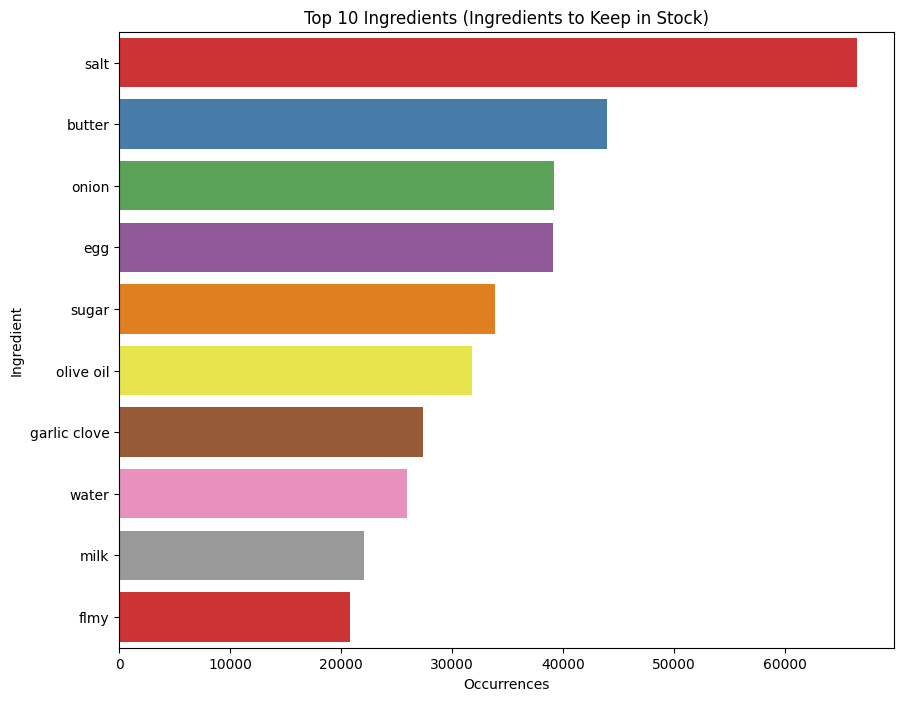

In [10]:
ing_freq = Counter([ingredient for list in df1['ingredient_ids']  
                                    for ingredient in list])

top10_ings = ing_freq.most_common(10)

plt.figure(figsize=(10, 8))
sns.barplot(x=[count[1] for count in top10_ings], y=[ingredient[0] for ingredient in top10_ings], palette='Set1', hue=[ingredient[0] for ingredient in top10_ings])
plt.xlabel('Occurrences')
plt.ylabel('Ingredient')
plt.title('Top 10 Ingredients (Ingredients to Keep in Stock)')
plt.show()

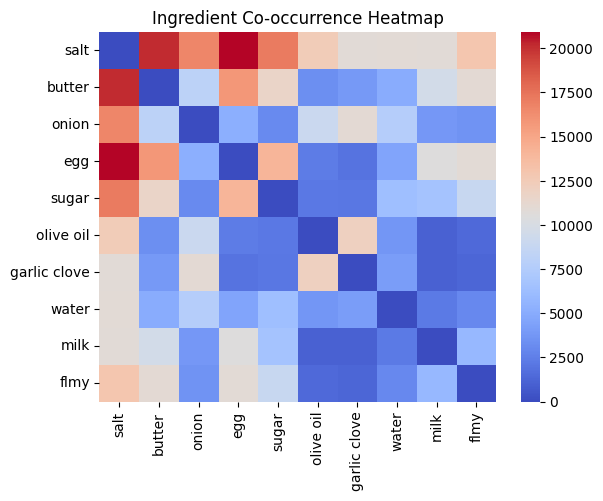

'\nA bit skewed due to how overwhelming the butter numbers are but still shows us some patterns\n'

In [11]:
#Get a simple list of top 10 ingredients instead of messing around with tuples all the time
top10_list = [ing[0] for ing in top10_ings]

#init empty dataframe as large as original
binary_ings = pd.DataFrame(0, index=df1.index, columns=top10_list)

#binary indicator for if a top10 ingredient present in given recipe
for i, ingredients in enumerate(df1['ingredient_ids']):
    for ingredient in ingredients:
        if ingredient in top10_list:
            binary_ings.at[i, ingredient] = 1

#Product of transpose and itself gives co-occurrences
co_occurrence = binary_ings.T.dot(binary_ings)

for ingredient in top10_list:
    co_occurrence.loc[ingredient, ingredient] = 0

sns.heatmap(co_occurrence, cmap='coolwarm')
plt.title('Ingredient Co-occurrence Heatmap')
plt.show()

'''
A bit skewed due to how overwhelming the butter numbers are but still shows us some patterns
'''

In [12]:
#Find recipes that don't contain any of the top 10 ingredients, then display a sample of them
uniques = df1[~df1['ingredient_ids'].apply(lambda ingredients: any(ingredient[0] in ingredients for ingredient in top10_ings))]

unique_samples = uniques[['name_tokens', 'ingredient_ids']].sample(10)

unique_samples

,name_tokens,ingredient_ids
71695,cosmo jello shots,"[cranberry gelatin, boiling water, cold water,..."
158986,crock pot hot fruit,"[applesauce, cherry pie filling, pineapple chu..."
168149,green curry paste namphrik gaeng keau,"[thai green chili, turmeric, garlic, galangal,..."
162764,cherry tomato and vegemite tarts,"[puff pastry, egg white, cherry tomato, button..."
132575,spanish olive salad,"[lettuce, red onion, spanish olife, red pepper..."
44435,molly s artichoke bread,"[artichoke heart, garlic, mayonnaise, parmesan..."
34695,watermelon cucumber margaritas,"[watermelon, english cucumber, fresh mint leaf..."
121558,slow cooker clam chowder,"[clam, clam juice, salt pork, white onion, bay..."
40926,kahlua balls,"[oreo cookies, nut, powdered sugar, kahlua, da..."
128789,easy perogie casserole,"[pasta sauce, cheese, cheddar, ham]"


<p4> Obviously there's some discrepancies/ingredients being represented by multiple names (e.g. sugar/granulated sugar, butter/unsalted butter), this shouldn't have an impact on the generative aspect of what we're doing but might come up in the searching? </p4>

<h4> So this isn't really A*, given that A* is a path-finding algorithm. This does however find a list of closest matching recipes given a list of ingredients and a cutoff for differences. Overall, a search with aspects of A* </h4>

In [10]:
# Build the ingredient-to-recipes hash table
ingredient_to_recipes = {}

for _, recipe in df1.iterrows():
    recipe_id = recipe['id']
    ingredients = recipe['ingredient_ids']
    for ingredient in ingredients:
        if ingredient not in ingredient_to_recipes:
            ingredient_to_recipes[ingredient] = []
        ingredient_to_recipes[ingredient].append(recipe_id)

In [14]:
len(ingredient_to_recipes['cheddar'])

12300

In [15]:
#Recipe nodes to track information on each recipe
class RecipeNode:
    def __init__(self, id, ingredients, name):
        self.id = id
        self.name = name
        self.ingredients = set(ingredients)
        self.g = 0
        self.h = 0
        self.f = 0  # Total cost

#Function for finding the g and h costs, in this case based on missing or extra ingredients
def calculate_costs(recipe_node, input_ingredients):
    extra_ingredients = recipe_node.ingredients - input_ingredients
    missing_ingredients = input_ingredients - recipe_node.ingredients
    recipe_node.g = len(extra_ingredients)
    recipe_node.h = len(missing_ingredients)
    recipe_node.f = recipe_node.g + recipe_node.h

def fake_a_star_search(recipes, input_ingredients, cutoff):
    #init an open list of unexplored nodes, create a starting node(essentially an empty recipe)
    open_list = [RecipeNode(id=recipe['id'], ingredients=recipe['ingredient_ids'], name=recipe['name_tokens']) for index, recipe in recipes.iterrows()]

    # Generate "successors"; Probably don't need to repeat this for each loop over the open_list
    for recipe in open_list:
        calculate_costs(recipe, input_ingredients)

    startNode = RecipeNode(id=0, ingredients=[''], name='')
    startNode.f = -1
    open_list.append(startNode)

    best_matches = []

    while open_list:
        #Sorting by the f costs to pop  the lowest cost node first
        open_list.sort(key=lambda x: x.f)
        #print(open_list[0].ingredients)
        current_node = open_list.pop(0)

        #If the current node is within the cutoff, we know it is a good recipe and add it to the matches list
        if 0 <= current_node.f <= cutoff:  
            best_matches.append(current_node)

        elif current_node.f > cutoff:
            break

    return best_matches

In [77]:
# Function to find candidate recipes that share at least one ingredient
def find_candidate_recipes(input_ingredients):
    candidate_recipes = set()
    for ingredient in input_ingredients:
        if ingredient in ingredient_to_recipes:
            candidate_recipes.update(ingredient_to_recipes[ingredient])
    return candidate_recipes

# Update your search function to include this filtering step
def optimized_fake_a_star_search(df, input_ingredients, cutoff):
    # Find candidate recipes that share at least one ingredient
    candidate_recipe_ids = find_candidate_recipes(input_ingredients)

    # Create a list of RecipeNodes for the filtered recipes
    filtered_recipes = df[df['id'].isin(candidate_recipe_ids)]
    open_list = [
        RecipeNode(id=recipe['id'], ingredients=recipe['ingredient_ids'], name=recipe['name_tokens'])
        for index, recipe in filtered_recipes.iterrows()
    ]

    # Calculate costs for each node
    for recipe in open_list:
        calculate_costs(recipe, input_ingredients)

    startNode = RecipeNode(id=0, ingredients=set(), name='')
    startNode.f = -1
    open_list.append(startNode)

    best_matches = []

    while open_list:
        # Sort by the f costs to pop the lowest cost node first
        open_list.sort(key=lambda x: x.f)
        current_node = open_list.pop(0)

        # If the current node is within the cutoff, add it to the matches list
        if 0 <= current_node.f <= cutoff:
            best_matches.append(current_node)

        elif current_node.f > cutoff:
            break

    return best_matches

In [33]:
# Example of the above search
input_ingredients = {'salt', 'butter', 'flmy', 'sugar', 'water', 'carrrot'}

matched_recipes = fake_a_star_search(df1, input_ingredients, 3)
if matched_recipes:
    print("Matching recipe/s found")
else:
    print("No matching recipes found.")

Matching recipe/s found


In [42]:
# Example of the above search
input_ingredients = {'salt', 'butter', 'flmy', 'sugar', 'water', 'carrrot'}

matched_recipes = optimized_fake_a_star_search(df1, input_ingredients, 3)
if matched_recipes:
    print("Matching recipe/s found")
else:
    print("No matching recipes found.")

Matching recipe/s found


In [34]:
for x in matched_recipes:
    display(x.name, x.ingredients)

display('Number of matches: ', len(matched_recipes))

'suzi s pop over puffs'

{'butter', 'egg', 'flmy', 'salt', 'sugar', 'water'}

'basic high altitude french bread for welbilt breadmaker'

{'butter', 'flmy', 'salt', 'sugar', 'water', 'yeast'}

'white loaf'

{'butter', 'flmy', 'salt', 'sugar', 'water', 'yeast'}

'grnn ertestuing norwegian creamed peas'

{'butter', 'dried pea', 'flmy', 'salt', 'sugar', 'water'}

'white trash cookbook dumplings'

{'butter', 'flmy', 'salt', 'water'}

'one loaf white bread'

{'butter', 'flmy', 'salt', 'sugar', 'water', 'yeast'}

'basic pastry crust'

{'butter', 'flmy', 'salt', 'water'}

'sweet butter pie dough'

{'butter', 'cold water', 'flmy', 'salt', 'sugar'}

'damson jam'

{'butter', 'sugar', 'water'}

'moomie s beautiful burger buns'

{'butter', 'egg', 'flmy', 'salt', 'sugar', 'water', 'yeast'}

'galuska for stew dumplings'

{'butter', 'egg', 'flmy', 'salt', 'water'}

'perfect pizza dough'

{'butter', 'flmy', 'pizza topping', 'salt', 'sugar', 'water', 'yeast'}

'quick buns'

{'butter', 'flmy', 'milk', 'salt', 'sugar', 'water', 'yeast'}

'mums lemon cheese spread no eggs'

{'butter', 'flmy', 'lemons, juice and zest of', 'sugar', 'water'}

'lemon butter sauce'

{'butter', 'flmy', 'lemon, juice of', 'sugar', 'water'}

'hartness house inn jalapeno bread'

{'butter', 'flmy', 'jalapeno', 'salt', 'sugar', 'water', 'yeast'}

'zwieback'

{'butter', 'flmy', 'milk', 'salt', 'sugar', 'water', 'yeast'}

'sweet onions'

{'butter', 'salt', 'sugar', 'water', 'white pearl onion'}

'rooster cookies sugar cookies'

{'butter', 'egg', 'flmy', 'salt', 'sugar'}

'gourmet glazed turnips'

{'butter', 'salt', 'sugar', 'turnip', 'water'}

'quick and easy pizza dough'

{'flmy', 'salt', 'sugar', 'water', 'yeast'}

'rosy crabapple or apple pie filling freeze or can'

{'butter', 'crabapple', 'flmy', 'lemon juice', 'salt', 'sugar', 'water'}

'ted s special mini loaves white bread bread machine'

{'butter', 'flmy', 'salt', 'sugar', 'water', 'whipping cream', 'yeast'}

'buttery no fail pie pastry'

{'butter', 'flmy', 'ice water', 'salt', 'sugar'}

'dane dumplings'

{'butter', 'egg', 'flmy', 'salt', 'water'}

'my hard rolls for bratwurst'

{'butter', 'egg', 'flmy', 'salt', 'sugar', 'water', 'yeast'}

'choux pastry for cream puffs eclairs etc'

{'butter', 'egg', 'flmy', 'sugar', 'water'}

'french baguette food processor'

{'flmy', 'salt', 'sugar', 'water', 'yeast'}

'sugar browned potatoes danish'

{'butter', 'new potato', 'salt', 'sugar', 'water'}

'overnight butter rolls'

{'butter', 'egg', 'flmy', 'salt', 'sugar', 'water', 'yeast'}

'kitchenaid pie pastry'

{'butter', 'flmy', 'salt', 'shortening', 'water'}

'truly easy pizza dough'

{'butter', 'flmy', 'milk', 'salt', 'sugar', 'water', 'yeast'}

'french glazed carrots'

{'butter', 'carrot', 'salt', 'sugar', 'water'}

'basic dough for spinach meat and cheese pies middle east pa'

{'butter', 'flmy', 'olive oil', 'salt', 'sugar', 'water', 'yeast'}

'easy french bread extra large'

{'flmy', 'salt', 'sugar', 'water', 'yeast'}

'classic dinner rolls'

{'butter', 'flmy', 'milk', 'salt', 'sugar', 'water', 'yeast'}

'tushennaya markov braised carrots'

{'butter', 'carrot', 'flmy', 'salt', 'sugar'}

'pastry cheesecake crust'

{'butter', 'egg', 'flmy', 'salt', 'sugar'}

'home fried yams'

{'butter', 'salt', 'sugar', 'water', 'yam'}

'quick sunday bread'

{'butter', 'flmy', 'salt', 'sugar', 'warm water', 'water', 'yeast'}

'instant potato norwegian lefse'

{'butter', 'flmy', 'milk', 'potato flake', 'salt', 'sugar', 'water'}

'julia child s cuisinart pie crust'

{'butter', 'flmy', 'salt', 'vegetable oil', 'water'}

'bread machine french bread dough'

{'flmy', 'salt', 'sugar', 'water', 'yeast'}

'one cookie'

{'baking soda', 'butter', 'flmy', 'salt', 'sugar', 'vanilla', 'water'}

'espresso brittle'

{'butter', 'espresso bean', 'salt', 'sugar', 'water'}

'mother s one hour rolls mors tvebakker'

{'butter', 'flmy', 'milk', 'salt', 'sugar', 'water', 'yeast'}

'mankomo s farmhouse bread'

{'butter', 'flmy', 'salt', 'sugar', 'water', 'white bread flmy', 'yeast'}

'bolillos'

{'flmy', 'salt', 'sugar', 'water', 'yeast'}

'auntie irene s foolproof pie crust small batch'

{'butter', 'egg', 'flmy', 'salt', 'sugar', 'water', 'white vinegar'}

'olive garden breadsticks'

{'butter', 'flmy', 'garlic powder', 'salt', 'sugar', 'water', 'yeast'}

'mel boller danish soup dumplings'

{'butter', 'egg', 'flmy', 'salt', 'water'}

'mini apple pies so easy not much hassle'

{'apple', 'butter', 'cinnamon', 'flmy', 'salt', 'sugar', 'water'}

'plain bagels'

{'flmy', 'salt', 'sugar', 'water', 'yeast'}

'food processor pie crust'

{'butter', 'flmy', 'salt', 'shortening', 'water'}

'bannock'

{'baking powder', 'flmy', 'salt', 'sugar', 'water'}

'buttermilk white bread bread machine'

{'butter', 'buttermilk', 'flmy', 'salt', 'sugar', 'water', 'yeast'}

'basic bread machine bread a b m'

{'butter', 'dry milk powder', 'flmy', 'salt', 'sugar', 'water', 'yeast'}

'beaten biscuits'

{'butter', 'flmy', 'milk', 'salt', 'sugar'}

'teresa s apple crisp'

{'butter', 'cinnamon', 'flmy', 'salt', 'sliced apple', 'sugar', 'water'}

'brown and serve rolls'

{'butter', 'flmy', 'milk', 'salt', 'sugar', 'water', 'yeast'}

'easy pie crust'

{'butter', 'cold water', 'flmy', 'salt', 'sugar'}

'Number of matches: '

61

In [79]:
sampled_list = df1['ingredient_ids'].sample(n=10, random_state=62)

sampled_list

7166      [broccoli floret, cauliflower floret, olive oi...
150114    [butter, flmy, salt and pepper, nutmeg, milk, ...
159423    [butter, leek, onion, rutabaga, carrot, russet...
10754     [beef, beet, carrot, onion, cabbage, citric ac...
14416     [refrigerated biscuit, catsup, mustard, ground...
167756         [potato, onion, garlic salt, pepper, butter]
119100           [garlic, butter, white bread, dried thyme]
166316    [flmy, sugar, salt, baking powder, cinnamon, a...
113585    [short rib of beef, vegetable oil, onion, pota...
81051     [chicken breast, roasted red pepper, marinated...
Name: ingredient_ids, dtype: object

In [63]:
import time


def time_metr(func, sampled_list, df1, cutoff):
    timesList = []

    for ing_list in sampled_list:
        s = set(ing_list)
        start = time.time()

        matched_recipes = func(df1, s, cutoff)

        end = time.time()
        tup = (len(s), (end-start))
        timesList.append(tup)
    
    return timesList

def sum_times(res):
    sum = 0

    for result in res:
        sum += result[1]
    
    return sum

In [82]:
results1 = time_metr(func=optimized_fake_a_star_search, sampled_list=sampled_list, df1=df1, cutoff=2)
results2 = time_metr(func=fake_a_star_search, sampled_list=sampled_list, df1=df1, cutoff=2)

display(results1, results2)

[(10, 6.7715911865234375),
 (9, 4.548283576965332),
 (15, 6.190171718597412),
 (9, 4.923309803009033),
 (5, 0.7741777896881104),
 (5, 3.9993627071380615),
 (4, 2.9117374420166016),
 (13, 5.051855802536011),
 (14, 5.376450061798096),
 (7, 0.6779441833496094)]

[(10, 8.464985132217407),
 (9, 8.109175443649292),
 (15, 8.100987672805786),
 (9, 7.647720575332642),
 (5, 8.259698629379272),
 (5, 8.199462890625),
 (4, 8.384476661682129),
 (13, 8.015439748764038),
 (14, 8.521573066711426),
 (7, 8.116940975189209)]

In [83]:
display(sum_times(results1))
display(sum_times(results2))

41.224884271621704

81.8204607963562

In [84]:
sumnorm = 0
sumopt = 0

for x in range(10):
    sampled_list = df1['ingredient_ids'].sample(n=10, random_state=x)

    results1 = time_metr(func=optimized_fake_a_star_search, sampled_list=sampled_list, df1=df1, cutoff=1)
    results2 = time_metr(func=fake_a_star_search, sampled_list=sampled_list, df1=df1, cutoff=1)

    sumopt += sum_times(results1)
    sumnorm += sum_times(results2)

display(sumopt)
display(sumnorm)

318.2983944416046

752.4248876571655

In [202]:
#Creating a directed graph
G = nx.DiGraph()

dfsampled = df1.sample(2000, random_state=2)
#Adding the nodes, only need the ingredient information, can later cross-ref the id to get name or other info
for id,ings in zip(dfsampled['id'], dfsampled['ingredient_ids']):
    G.add_node(id, ingredients=ings)

#Maybe use percentage threshhold for better results?
def recipes_related(ingredients1, ingredients2):
    # Finds if recipes are closely enough related, and the added/removed ingredients between them
    added = set(ingredients2) - set(ingredients1)
    removed = set(ingredients1) - set(ingredients2)
    if (added or removed) and len(added) <= 3 and len(removed) <= 3:
        return True, added, removed
    return False, set(), set()

'''
idList = dfsampled['id'].tolist()
inglistList = dfsampled['ingredient_ids'].tolist()
iterRec = zip(idList, inglistList)


for id1 in idList:
    for id2 in idList:
        if id1 != id2:
            rel, add, rem = recipes_related(G.nodes[id1]['ingredients'], G.nodes[id2]['ingredients'])
        if rel:
            #display(id1, id2, ings1, ings2)
            G.add_edge(id1, id2, added=list(add), removed=list(rem))
'''
for id1, ings1 in G.nodes(data=True):
    for id2, ings2 in G.nodes(data=True):
        if id1 != id2:
            #Do some stuff to compare nodes -> create edges
            rel, add, rem = recipes_related(ings1['ingredients'], ings2['ingredients'])
            if rel:
                G.add_edge(id1, id2, added=list(add), removed=list(rem))


display(len([node for node, out_degree in G.out_degree() if out_degree == 0]))
G.edges()

1563

OutEdgeView([(31557, 200388), (31557, 376807), (31557, 256977), (471278, 323262), (471278, 130776), (471278, 347201), (175886, 118778), (175886, 483034), (175886, 321045), (200388, 31557), (200388, 80082), (200388, 105735), (200388, 504245), (200388, 192195), (200388, 352635), (200388, 331069), (200388, 18653), (200388, 308994), (200388, 120846), (200388, 56931), (200388, 141878), (200388, 6717), (200388, 376807), (200388, 105692), (200388, 281614), (200388, 28524), (200388, 50467), (200388, 491088), (200388, 105520), (200388, 41990), (200388, 29165), (200388, 225463), (200388, 339220), (200388, 196415), (200388, 31629), (200388, 350137), (200388, 256977), (200388, 43221), (200388, 215839), (200388, 243942), (41024, 125256), (41024, 143133), (293646, 51447), (131356, 143616), (131356, 377039), (131356, 137213), (131356, 151105), (131356, 39725), (131356, 301847), (329722, 60634), (329722, 224148), (329722, 43375), (80082, 200388), (80082, 504245), (80082, 192195), (80082, 331069), (800

In [190]:
#df1[df1['id'] == 424415].ingredient_ids.item()

['basmati rice', 'water', 'salt', 'cinnamon stick', 'green cardamom pod']

In [173]:
g = nx.get_node_attributes(G, 'ingredients')
G.edges()

OutEdgeView([(7595, 184408), (7595, 359177)])

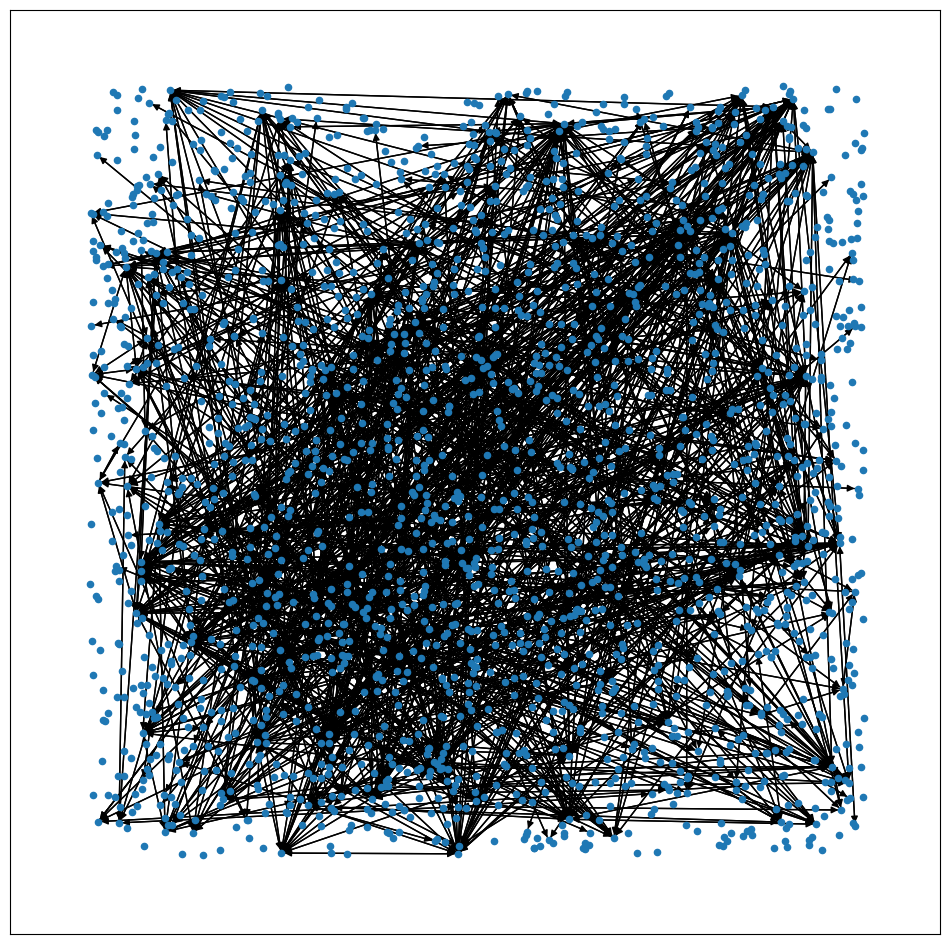

In [117]:
pos = nx.random_layout(G)
plt.figure(figsize=(12,12))
nx.draw_networkx(G, pos,with_labels=False ,node_size=20, arrowsize=10)

In [119]:
[node for node, out_degree in G.out_degree() if out_degree == 0]

[70921,
 43398,
 293517,
 195646,
 88409,
 57528,
 47960,
 283913,
 206337,
 255328,
 193106,
 37453,
 151726,
 154899,
 332809,
 127576,
 350141,
 280428,
 247689,
 72894,
 146656,
 358447,
 159059,
 285506,
 394001,
 272035,
 37393,
 116612,
 159191,
 283686,
 370552,
 404612,
 12435,
 44215,
 240817,
 33216,
 233512,
 190168,
 127498,
 329732,
 368778,
 56112,
 207685,
 222051,
 158467,
 140835,
 306749,
 310399,
 59049,
 376707,
 124835,
 325534,
 189444,
 24126,
 51213,
 417566,
 308013,
 10581,
 175317,
 175976,
 305934,
 134967,
 170956,
 432494,
 533,
 28141,
 31128,
 175305,
 225559,
 408148,
 188280,
 124499,
 356329,
 297946,
 9875,
 108528,
 378033,
 157032,
 145022,
 66593,
 185494,
 64275,
 192869,
 278789,
 115645,
 297383,
 90162,
 279144,
 114785,
 253539,
 121010,
 236336,
 171464,
 484096,
 425294,
 282968,
 149441,
 74008,
 446919,
 290001,
 192145,
 117170,
 251454,
 305849,
 389304,
 142483,
 90084,
 18235,
 76247,
 357051,
 373324,
 80049,
 170235,
 238303,
 3499

In [129]:
df1[df1['id'] == 70921]['ingredient_ids'].values

array([list(['chocolate', 'baking chocolate square', 'butter', 'light sour cream', 'light brown sugar', 'light karo syrup', 'egg', 'vanilla', 'flmy', 'baking soda', 'salt', 'chocolate chip'])],
      dtype=object)